In [76]:
#imports
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [77]:
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive')
print("Change successful.")

Mounted at /content/drive
Change successful.


In [78]:
data = pd.read_csv('car_price.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## 1. Exploratory Data Analysis

In [79]:
print("Rows: ",data.shape[0])
print("Columns: ",data.shape[1])

Rows:  205
Columns:  26


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [81]:
data.isna().sum()
#there are no undefined values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [82]:
data.duplicated().sum()
#there are no duplicated rows

0

In [83]:
data.groupby("CarName").sum()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
CarName,,,,,,,,,,,,,,,,
Nissan versa,90,1,94.5,165.3,63.8,54.5,1889,97,3.15,3.29,9.4,69,5200,31,37,5499.0
alfa-romero Quadrifoglio,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
alfa-romero giulia,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
alfa-romero stelvio,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
audi 100 ls,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volvo 246,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0
volvo 264gl,404,-3,213.4,377.6,136.1,111.7,6107,271,7.40,6.30,17.0,276,10500,36,47,41045.0
volvo diesel,200,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0


In [84]:
#drop CarName, CarID since it doesn't add much value to the regression task
data = data.drop(['car_ID','CarName'],axis=1)
data.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


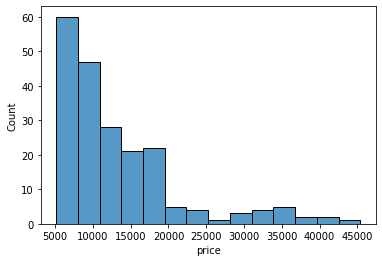

In [85]:
sns.histplot(data=data, x="price")

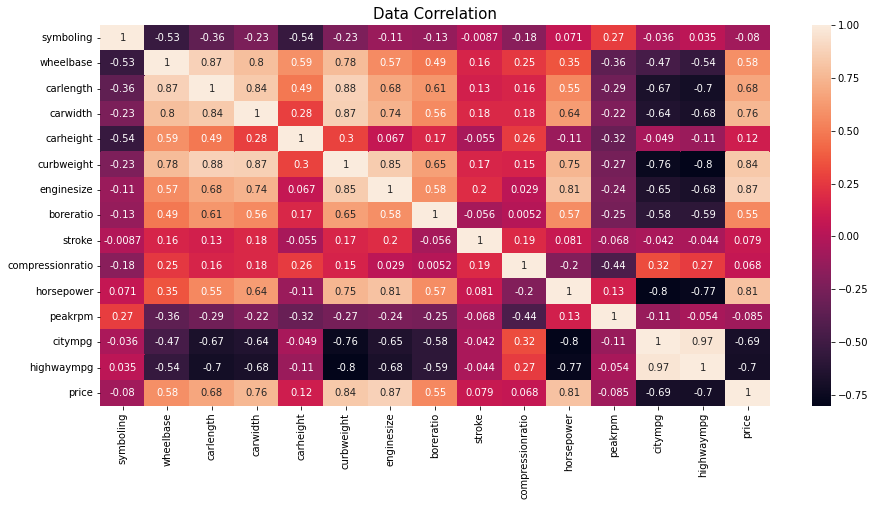

In [86]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.title("Data Correlation",size=15)
plt.show()

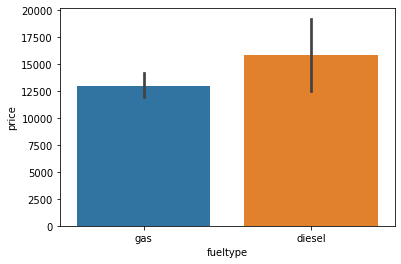

In [87]:
#Influence of fuel type on price
sns.barplot(x="fueltype", y="price", data=data)

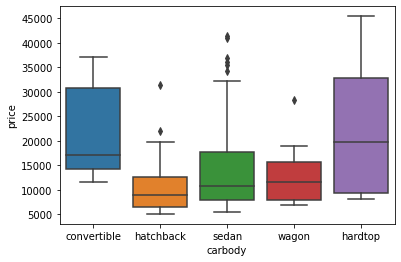

In [88]:
#Influence of car type on price
sns.boxplot(x ="carbody", y ="price", data = data)

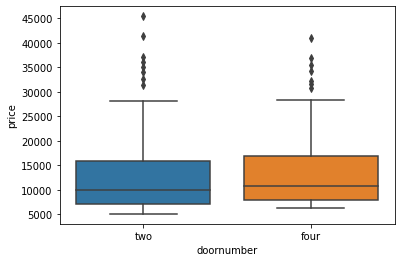

In [89]:
#Influence of number of doors on price
sns.boxplot(x ="doornumber", y ="price", data = data)

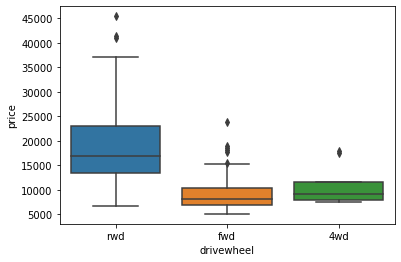

In [90]:
#Influence of drive(FWD, RWD, AWD) on price
sns.boxplot(x ="drivewheel", y ="price", data = data)

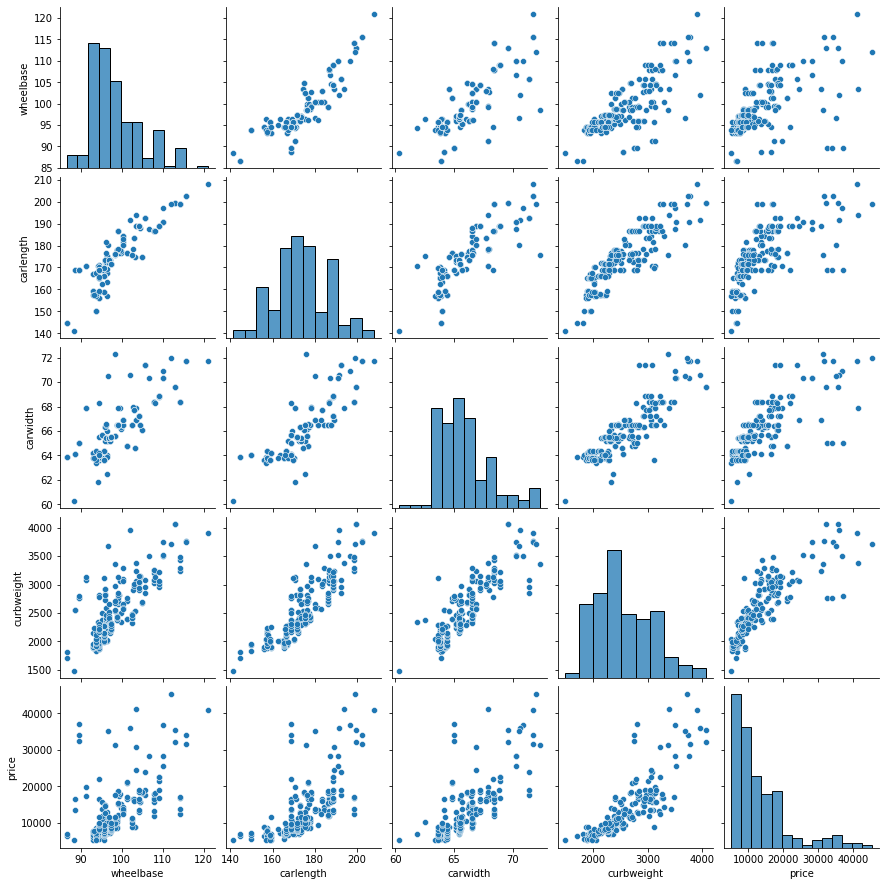

In [91]:
#plot the pairwise relationship between most relevant attributes from the heatmap
columns=data[['wheelbase','carlength','carwidth','curbweight','price']]
sns.pairplot(columns)
plt.show()
#linear relationship

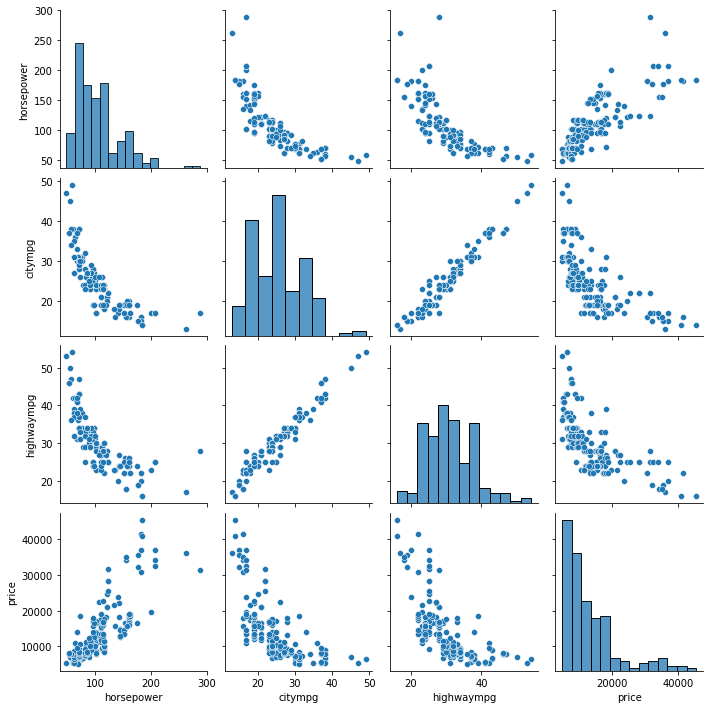

In [92]:
columns=data[['horsepower','citympg','highwaympg','price']]
sns.pairplot(columns)
plt.show()
#linear relationship

The following sets of attributes have a linear relationship:

1. wheelbase, carlength, carwidth, curbweight & price (essentially all the physical attributes)

2. horsepower, citympg, highwaympg & price (essentially all the attributes related to vehicle power)

## 2. Model Training

In [93]:
encoder = LabelEncoder()
data['fueltype'] = encoder.fit_transform(data['fueltype'])
fueltype = {index : label for index, label in enumerate(encoder.classes_)}
data['aspiration'] = encoder.fit_transform(data['aspiration'])
aspiration = {index : label for index, label in enumerate(encoder.classes_)}
data['doornumber'] = encoder.fit_transform(data['doornumber'])
doornumber = {index : label for index, label in enumerate(encoder.classes_)}
data['carbody'] = encoder.fit_transform(data['carbody'])
carbody = {index : label for index, label in enumerate(encoder.classes_)}
data['drivewheel'] = encoder.fit_transform(data['drivewheel'])
drivewheel = {index : label for index, label in enumerate(encoder.classes_)}
data['enginelocation'] = encoder.fit_transform(data['enginelocation'])
enginelocation = {index : label for index, label in enumerate(encoder.classes_)}
data['fuelsystem'] = encoder.fit_transform(data['fuelsystem'])
fuelsystem = {index : label for index, label in enumerate(encoder.classes_)}
data['enginetype'] = encoder.fit_transform(data['enginetype'])
enginetype = {index : label for index, label in enumerate(encoder.classes_)}
data['cylindernumber'] = encoder.fit_transform(data['cylindernumber'])
cylindernumber = {index : label for index, label in enumerate(encoder.classes_)}
data['fuelsystem'] = encoder.fit_transform(data['fuelsystem'])
fuelsystem = {index : label for index, label in enumerate(encoder.classes_)}

In [94]:
x = data.drop('price', axis=1)
y = data['price']

In [95]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

In [96]:
#train, test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)

1. Random Forest Regressor

In [97]:
rf = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=33)

In [98]:
print("Training r2_score: ",rf.score(x_train, y_train))
print("Testing r2_score: ",rf.score(x_test, y_test))

Training r2_score:  0.9753559007565417
Testing r2_score:  0.87367804775233


2. Decision Tree Regressor

In [99]:
dt = DecisionTreeRegressor( max_depth=5,random_state=33)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=33)

In [100]:
print('Training r2_score: ' , dt.score(x_train, y_train))
print('Testing r2_score: ' , dt.score(x_test, y_test))

Training r2_score:  0.9735394081185511
Testing r2_score:  0.8226507572837073


3. Linear Regression

In [101]:
def evaluate(model,x_train , y_train, x_test , y_test, y_predict):
    print(f'r2_score : {r2_score(y_test, y_predict)}')

In [102]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
evaluate(model,x_train , y_train, x_test , y_test, y_predict)

r2_score : 0.7289860743862651
